## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pickle as pk
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

## Extract Filenames From Folder

In [20]:
filen = []
for file in os.listdir(r"C:\\Users\\MAHIMA BAYLA\\Downloads\\FR Project"):
        #filen.append(os.path.join(r"C:\\Users\\MAHIMA BAYLA\\Downloads\\FR Project", file))
        print(os.path.join(r"C:\\Users\\MAHIMA BAYLA\\Downloads\\FR Project", file))
        break
          

C:\\Users\\MAHIMA BAYLA\\Downloads\\FR Project\app.py


In [22]:
filen = []
for file in os.listdir(r"C:\\Users\\MAHIMA BAYLA\\Downloads\\FR Project"):
    filen.append(os.path.join(r"C:\\Users\\MAHIMA BAYLA\\Downloads\\FR Project", file))

In [23]:
filen[0]

'C:\\\\Users\\\\MAHIMA BAYLA\\\\Downloads\\\\FR Project\\app.py'

In [24]:
len(filen)

4

## Importing ResNet50 Model and Configuration

In [25]:
model = ResNet50(weights = "imagenet", include_top = False, input_shape = (224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                    GlobalMaxPool2D()])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

## Extracting Features From Image

In [26]:
img = image.load_img("sunglass.jpg", target_size = (224, 224))
img_array = image.img_to_array(img)
expand_dim = np.expand_dims(img_array, axis = 0)
img_prepro = preprocess_input(expand_dim)
result = model.predict(img_prepro).flatten()
result.shape
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([0.00922528, 0.00160292, 0.00077875, ..., 0.01937359, 0.03458976,
       0.00445716], dtype=float32)

In [27]:
result

array([ 3.0903506 ,  0.53695786,  0.2608722 , ...,  6.4899025 ,
       11.58712   ,  1.4930911 ], dtype=float32)

In [34]:
def extract_feature_from_images(image_path, model):
    img = image.load_img(image_path, target_size = (224, 224))
    img_array = image.img_to_array(img)
    expand_dim = np.expand_dims(img_array, axis = 0)
    img_prepro = preprocess_input(expand_dim)
    result = model.predict(img_prepro).flatten()
    norm_result = result/norm(result)
    return norm_result

In [40]:
extract_feature_from_images(filen[1], model)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000017C2F69DE90>

In [38]:
image_features = []
for file in filen:
    image_features.append(extract_feature_from_images(file, model))
image_features

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000017C2F60DC60>

In [ ]:
image_features = pk.dump(image_features, open("Images_features.pkl", "wb"))

In [ ]:
filen = pk.dump(filen, open("filenames.pk", "wb"))

## Loading Pickle Files

In [ ]:
image_features = pk.load(open("Images_features.pkl", "rb"))

In [ ]:
filen = pk.load(open("filenames.pk", "rb"))

In [ ]:
np.array(image_features).shape

(20449, 2048)

## Finding Similar Images

In [ ]:
neighbors = NearestNeighbors(n_neighbors = 6, algorithm = "brute", metric = "euclidean")

In [ ]:
neighbors.fit(image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [ ]:
input_image = extract_feature_from_images("sunglass.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


In [ ]:
distance,indices = neighbors.kneighbors([input_image])

In [ ]:
indices[0]

array([11898,  9484,  9469, 16497, 16980,  9812], dtype=int64)

In [ ]:
from IPython.display import Image

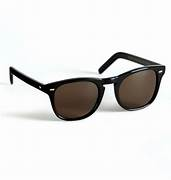

In [ ]:
Image("sunglass.jpg")

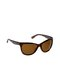

In [ ]:
Image(filen[indices[0][0]])

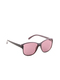

In [ ]:
Image(filen[indices[0][1]])

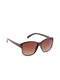

In [ ]:
Image(filen[indices[0][2]])

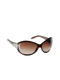

In [ ]:
Image(filen[indices[0][3]])

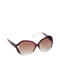

In [ ]:
Image(filen[indices[0][4]])

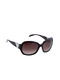

In [ ]:
Image(filen[indices[0][5]])